# **Assignment 3**  
---

### **Subject**:  
**Image Processing**

---

### **Submitted To**:  
**Prof. Dr. Ankita Vaish**  
Department of Computer Science

---

### **Submitted By**:  
**Romit Dubey**  
Exam Roll No. - 24419MCA030 
M.C.A. 2nd Semester

**Academic Year**: 2024-2025


---

# 1. Perform histogram matching by taking two images.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [70]:
img1 = tf.keras.utils.load_img("test_img.png")
img1 = tf.image.rgb_to_grayscale(img1)

img2= tf.keras.utils.load_img("chillguy.jpg")
img2 = tf.image.rgb_to_grayscale(img2)

In [71]:
img1 = tf.keras.utils.img_to_array(img1, dtype=np.int32)
img2 = tf.keras.utils.img_to_array(img2, dtype =np.int32)

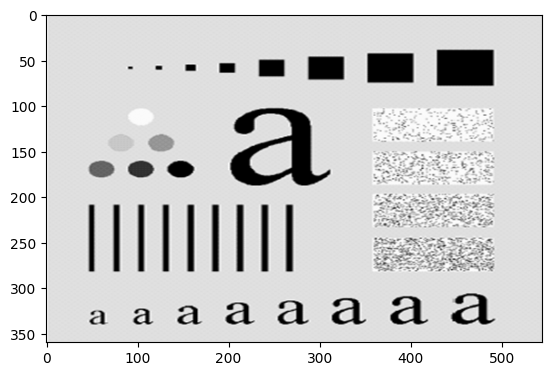

In [72]:
plt.imshow(img1, cmap="gray")

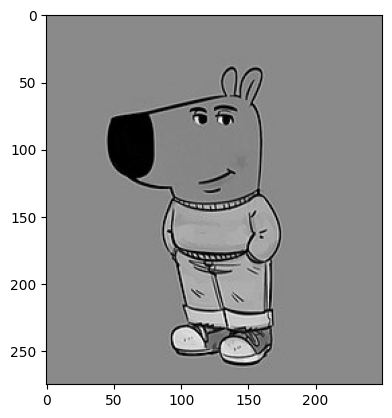

In [73]:
plt.imshow(img2, cmap="gray")

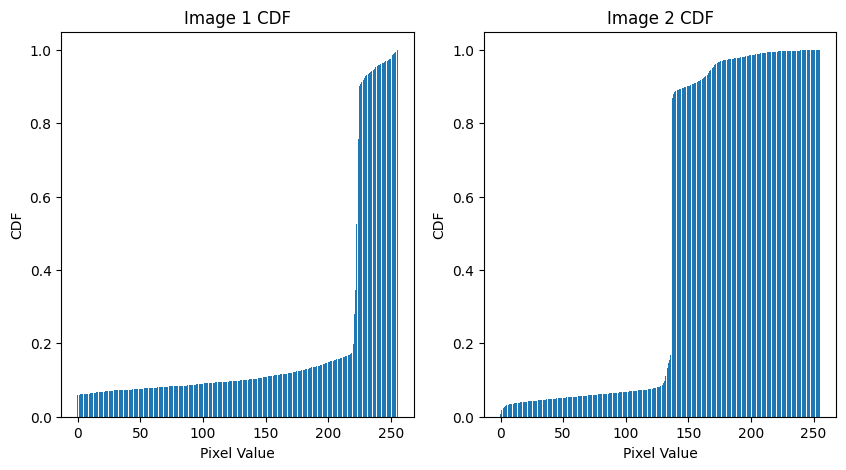

In [74]:
def calculate_histogram(image):
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1
    return hist

def calculate_cdf(hist):
    cdf = np.zeros_like(hist)
    cdf[0] = hist[0]
    for i in range(1,len(hist)):
        cdf[i] = cdf[i-1] + hist[i]
    return cdf/cdf[-1]

img1_freq = calculate_histogram(img1)
img1_cdf = calculate_cdf(img1_freq)

img2_freq = calculate_histogram(img2)
img2_cdf = calculate_cdf(img2_freq)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].bar(range(len(img1_cdf)),img1_cdf)
axs[0].set_xlabel("Pixel Value")
axs[0].set_ylabel("CDF")
axs[0].set_title("Image 1 CDF")

axs[1].bar(range(len(img2_cdf)),img2_cdf)
axs[1].set_xlabel("Pixel Value")
axs[1].set_ylabel("CDF")
axs[1].set_title("Image 2 CDF")

plt.show()


In [75]:
def mapping(srcimg,targetimg):
    m = np.zeros(256, dtype="uint8")
    for i in range(256):
        m[i] = np.argmin(np.abs(targetimg-srcimg[i]))
    return m

In [76]:
mapping_rule = mapping(img1_cdf,img2_cdf)

In [77]:
mapping_rule

array([ 74,  76,  78,  78,  80,  82,  83,  84,  85,  87,  88,  91,  92,
        93,  95,  96,  96,  97,  99,  99, 100, 102, 104, 105, 106, 106,
       107, 108, 108, 110, 111, 111, 112, 112, 113, 113, 113, 114, 115,
       116, 116, 116, 117, 117, 117, 118, 119, 119, 119, 120, 121, 121,
       122, 123, 123, 123, 124, 124, 124, 124, 124, 125, 125, 125, 125,
       126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 129,
       129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130,
       130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131,
       131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132, 132,
       132, 132, 132, 133, 133, 133, 133, 133, 133, 133, 133, 13

In [78]:
img1.shape[0]

360

In [79]:
def histogram_matching(srcimg,mapping_rule):
    matched_img = np.zeros_like(srcimg)
    for i in range(srcimg.shape[0]):
        for j in range(srcimg.shape[1]):
            matched_img[i][j] = mapping_rule[srcimg[i,j]]
    return matched_img

In [80]:
mapped_img = histogram_matching(img1,mapping_rule)

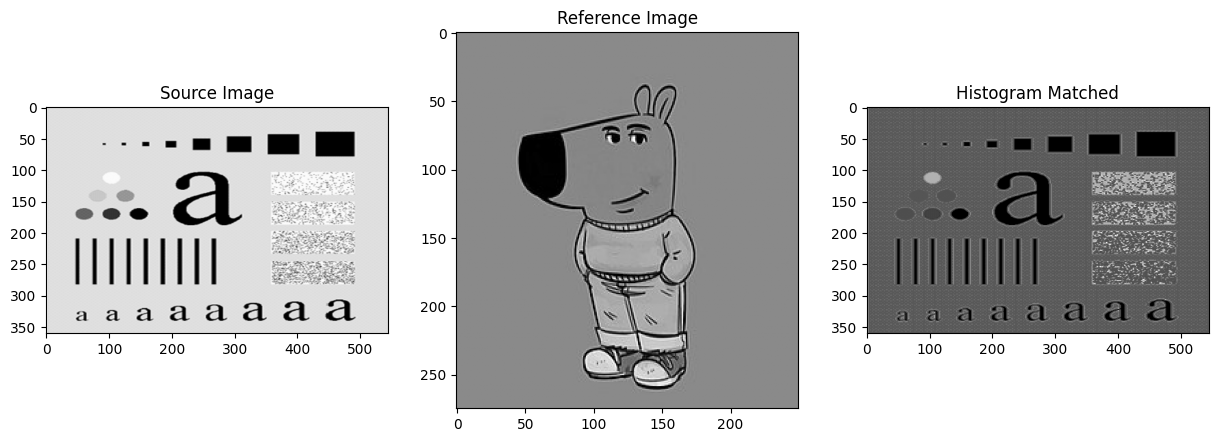

In [81]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Source Image")
plt.imshow(img1, cmap='gray')

plt.subplot(1,3,2)
plt.title("Reference Image")
plt.imshow(img2, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histogram Matched")
plt.imshow(mapped_img, cmap='gray')

# 2. Write a program to perform smoothing on an image with averaging filters of size 3, 5, 9, 15 and 35. Show results in a subplot.


In [3]:
img1 = tf.keras.utils.load_img("chillguy.jpg")
img1 = tf.image.rgb_to_grayscale(img1)
img1 = np.array(img1)

In [61]:
def filter(img,filter_size):
    r,c,_ = img.shape
    smooth_img = img.copy()
    mid_cell = int(filter_size/2)
    total = filter_size*filter_size8920

    for i in range(0,r-filter_size+1):
        for j in range(0,c-filter_size+1):
            total_sum = 0
            for k in range(filter_size):
                for l in range(filter_size):
                    total_sum += img[i+k][j+l][0]
            smooth_img[mid_cell+i][mid_cell+j] = total_sum/total
    return smooth_img

In [ ]:
smooth_3 = filter(img1,3)
smooth_5 = filter(img1,5)
smooth_9 = filter(img1,9)
smooth_15 = filter(img1,15)
smooth_35= filter(img1,35)

In [ ]:
plt.figure(figsize=(30, 20)) 
plt.subplot(3,3,1)
plt.imshow(img1,cmap="gray") 
plt.title('Original Image') 

plt.subplot(3,3,2) 
plt.imshow(smooth_3,cmap="gray") 
plt.title('3x3 Smoothening') 

plt.subplot(3,3,3)
plt.imshow(smooth_5,cmap="gray") 
plt.title('5x5 Smoothening') 

plt.subplot(3,3,4) 
plt.imshow(smooth_9,cmap="gray") 
plt.title('9x9 Smoothening') 

plt.subplot(3,3,5) 
plt.imshow(smooth_15,cmap="gray") 
plt.title("15x15 Smoothening")

plt.subplot(3,3,6)
plt.imshow(smooth_35, cmap = "gray")
plt.title("35x35 Smoothening")

plt.show()

# 3.  Write a program to perform filtering in spatial domain using a median, max and min filters of size 3 * 3, 5 * 5, 11 * 11. Show results in a subplot.

In [4]:
img1 = tf.keras.utils.load_img("test_img.png")
img1 = tf.image.rgb_to_grayscale(img1)
img1 = np.array(img1)

In [ ]:
def apply_filter(img,filter_size,mode):
    r,c,_ = img.shape
    filtered_img = img.copy()
    mid_cell = int(filter_size/2)

    for i in range(0,r-filter_size+1):
        for j in range(0,c-filter_size+1):
            med = []
            for k in range(filter_size):
                for l in range(filter_size):
                    med.append(img[i+k][j+l][0])
            med.sort()
            if mode=="Median":
                filtered_img[mid_cell+i][mid_cell][0] = med[int((filter_size**2)/2)]
            elif mode=="Max":
                filtered_img[mid_cell+i][mid_cell][0] = med[-1]
            elif mode=="Min":
                filtered_img[mid_cell+i][mid_cell][0] = med[0]
    return filtered_img

In [ ]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1)
plt.imshow(img1,cmap="gray") 
plt.title('Original Image') 

plt.subplot(2,2,2) 
plt.imshow(apply_filter(img1,3,"Median"),cmap="gray") 
plt.title('Median Filter 3*3') 

plt.subplot(2,2,3)
plt.imshow(apply_filter(img1,5,"Median"),cmap="gray") 
plt.title('Median Filter 5*5') 

plt.subplot(2,2,4) 
plt.imshow(apply_filter(img1,11,"Median"),cmap="gray") 
plt.title('Median Filter 11*11') 
plt.suptitle("Median Filter")
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1)
plt.imshow(img1,cmap="gray") 
plt.title('Original Image') 

plt.subplot(2,2,2) 
plt.imshow(apply_filter(img1,3,"Max"),cmap="gray") 
plt.title('Max Filter 3*3') 

plt.subplot(2,2,3)
plt.imshow(apply_filter(img1,5,"Max"),cmap="gray") 
plt.title('Max Filter 5*5') 

plt.subplot(2,2,4) 
plt.imshow(apply_filter(img1,11,"Max"),cmap="gray") 
plt.title('Max Filter 11*11') 
plt.suptitle("Max Filter")
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1)
plt.imshow(img1,cmap="gray") 
plt.title('Original Image') 

plt.subplot(2,2,2) 
plt.imshow(apply_filter(img1,3,"Min"),cmap="gray") 
plt.title('Min Filter 3*3') 

plt.subplot(2,2,3)
plt.imshow(apply_filter(img1,5,"Min"),cmap="gray") 
plt.title('Min Filter 5*5') 

plt.subplot(2,2,4) 
plt.imshow(apply_filter(img1,11,"Min"),cmap="gray") 
plt.title('Min Filter 11*11') 
plt.suptitle("Min Filter")
plt.show()

# 4. Write a program for finding edges in an image using Gradient mask, Cross-gradient mask of size 2*2. Obtain sharpen image also.

In [5]:
img1 = np.squeeze(img1)

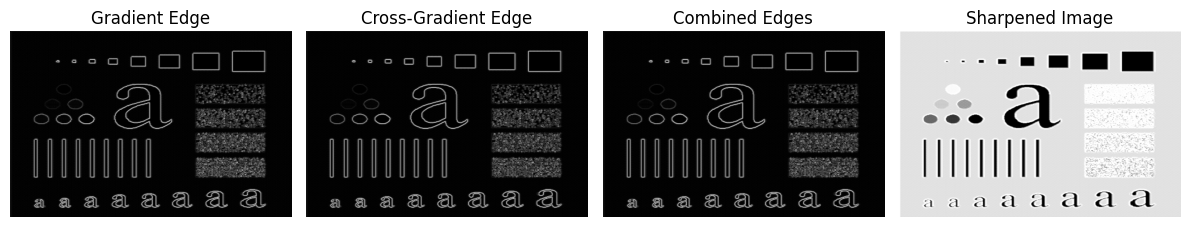

In [6]:
gx_mask = np.array([[-1, 0], [1,0]])
gy_mask = np.array([[-1, 1], [0,0]])
cgx_mask = np.array([[1, 0], [0, -1]])
cgy_mask = np.array([[0, 1], [-1, 0]])

def apply_mask(img, mask):
    h, w = img.shape
    mh, mw = mask.shape
    output = np.zeros((h - mh + 1, w - mw + 1), dtype=np.float32)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = img[i:i+mh, j:j+mw]
            output[i, j] = np.sum(region * mask)
    return output

gx = apply_mask(img1, gx_mask)
gy = apply_mask(img1, gy_mask)
cgx = apply_mask(img1, cgx_mask)
cgy = apply_mask(img1, cgy_mask)

grad_mag = np.sqrt(gx**2 + gy**2)
cross_grad_mag = np.sqrt(cgx**2 + cgy**2)
combined_edges = (grad_mag + cross_grad_mag) / 2

orig_cropped = img1[:combined_edges.shape[0], :combined_edges.shape[1]]
sharpened_image = np.clip(orig_cropped + combined_edges, 0, 255)

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(grad_mag, cmap='gray')
plt.title('Gradient Edge')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cross_grad_mag, cmap='gray')
plt.title('Cross-Gradient Edge')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(combined_edges, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Write a program for finding edges in an image using Sobel filter.

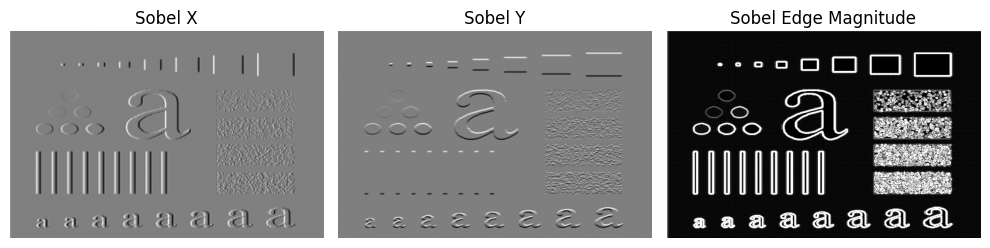

In [42]:
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

def apply_mask(image, mask):
    h, w = image.shape
    mh, mw = mask.shape
    output = np.zeros((h - mh + 1, w - mw + 1), dtype=np.float32)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i+mh, j:j+mw]
            output[i, j] = np.sum(region * mask)
    return output

gx = apply_mask(img1, sobel_x)
gy = apply_mask(img1, sobel_y)

sobel_edge = np.sqrt(gx**2 + gy**2)

sobel_edge = np.clip(sobel_edge, 0, 255)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(gx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gy, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Write a program to perform following operations for sharpening an image:

## a. Take an image (attached)

## b. Apply Laplacian filter

## c. Obtain sharpen image by adding ‘a’ and ‘b’

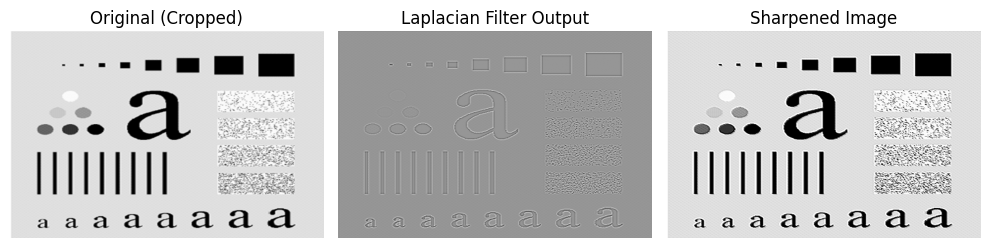

In [44]:
laplacian_filter = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

def apply_mask(image, mask):
    h, w = image.shape
    mh, mw = mask.shape
    output = np.zeros((h - mh + 1, w - mw + 1), dtype=np.float32)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i+mh, j:j+mw]
            output[i, j] = np.sum(region * mask)
    return output

laplacian_output = apply_mask(img1, laplacian_filter)

orig_cropped = img1[:laplacian_output.shape[0], :laplacian_output.shape[1]]

sharpened = np.clip(orig_cropped + laplacian_output, 0, 255)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(orig_cropped, cmap='gray')
plt.title("Original (Cropped)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_output, cmap='gray')
plt.title("Laplacian Filter Output")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# 7.  Write a program for sharpening an image using unsharp masking. 

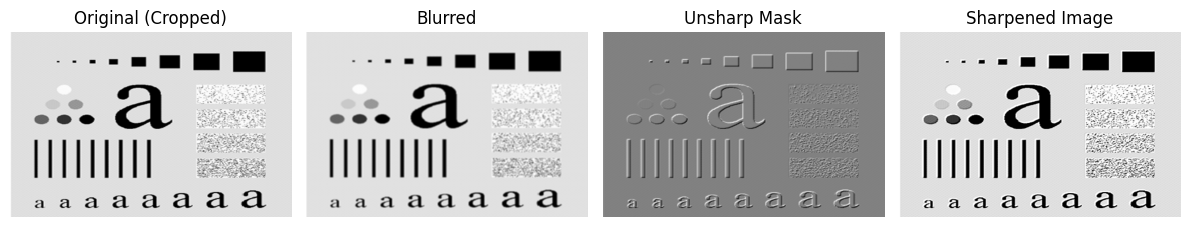

In [46]:
avg_filter = np.ones((3, 3), dtype=np.float32) / 9

def apply_mask(image, mask):
    h, w = image.shape
    mh, mw = mask.shape
    output = np.zeros((h - mh + 1, w - mw + 1), dtype=np.float32)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i+mh, j:j+mw]
            output[i, j] = np.sum(region * mask)
    return output

blurred = apply_mask(img1, avg_filter)

original_cropped = img1[:blurred.shape[0], :blurred.shape[1]]
mask = original_cropped - blurred

k = 1.0
sharpened = np.clip(original_cropped + k * mask, 0, 255)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_cropped, cmap='gray')
plt.title("Original (Cropped)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask, cmap='gray')
plt.title("Unsharp Mask")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()